#  Home vs Away Statistics

Import necessary libraries

In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The `BASE_URL` will point the notebook at the Django API. If using localhost, the Django project must be running.

In [2]:
BASE_URL = 'http://127.0.0.1:8000/api/'
next_url = BASE_URL + 'matches'

In [3]:
full_time_results = [0, 0, 0]
half_time_results = [0, 0, 0]
home_shots = 0
away_shots = 0
home_shots_on_target = 0
away_shots_on_target = 0
home_corners = 0
away_corners = 0
home_fouls = 0
away_fouls = 0
home_yellow_cards = 0
away_yellow_cards = 0
home_red_cards = 0
away_red_cards = 0

The API is paginated, with the `next` field being `null` when the last page is reached

In [5]:
while next_url is not None:
    response = requests.get(next_url)
    data = json.loads(response.text)
    
    for match in data['results']:
        if match['full_time_result'] == 'H':
            full_time_results[0] += 1
        elif match['full_time_result'] == 'D':
            full_time_results[1] += 1
        else:
            full_time_results[2] += 1
        
        if match['half_time_result'] == 'H':
            half_time_results[0] += 1
        elif match['half_time_result'] == 'D':
            half_time_results[1] += 1
        else:
            half_time_results[2] += 1
        
        home_shots += match['home_total_shots']
        away_shots += match['away_total_shots']
        home_shots_on_target += match['home_shots_on_target']
        away_shots_on_target += match['away_shots_on_target']
        home_corners += match['home_corners']
        away_corners += match['away_corners']
        home_fouls += match['home_fouls_committed']
        away_fouls += match['away_fouls_committed']
        home_yellow_cards += match['home_yellow_cards']
        away_yellow_cards += match['away_yellow_cards']
        home_red_cards += match['home_red_cards']
        away_red_cards += match['away_red_cards']
    
    next_url = data['next']

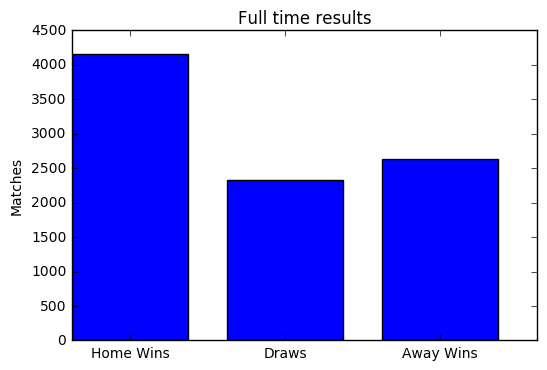

In [7]:
ind = np.arange(3)
width = 0.75
fig, axes = plt.subplots()
bars = axes.bar(ind, full_time_results, width)

axes.set_title('Full time results')
axes.set_ylabel('Matches')
axes.set_xticks(ind + width / 2)
axes.set_xticklabels(('Home Wins', 'Draws', 'Away Wins'))

plt.show()

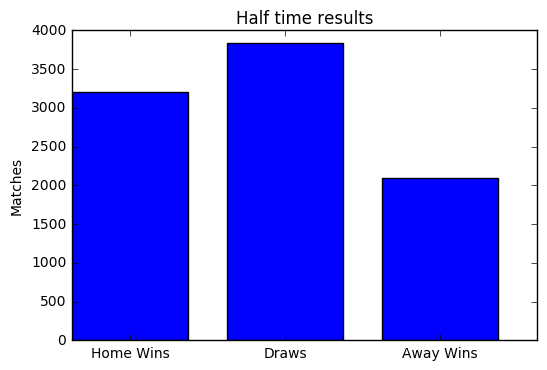

In [33]:
ind = np.arange(3)
width = 0.75
fig, axes = plt.subplots()
bars = axes.bar(ind, half_time_results, width)

axes.set_title('Half time results')
axes.set_ylabel('Matches')
axes.set_xticks(ind + width / 2)
axes.set_xticklabels(('Home Wins', 'Draws', 'Away Wins'))

plt.show()

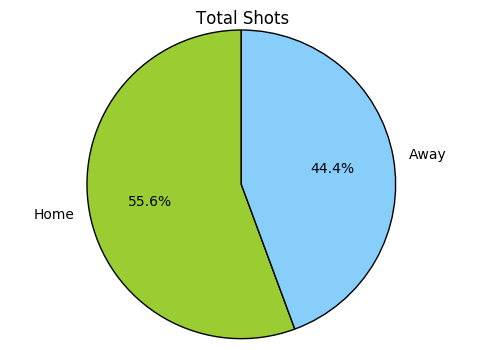

In [32]:
labels = 'Home', 'Away'
sizes = [home_shots, away_shots]
colors = ['yellowgreen', 'lightskyblue']

plt.title('Total Shots')
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

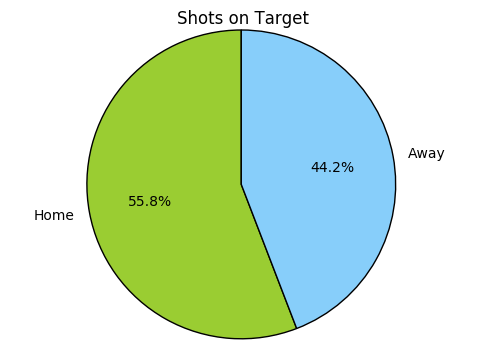

In [31]:
labels = 'Home', 'Away'
sizes = [home_shots_on_target, away_shots_on_target]
colors = ['yellowgreen', 'lightskyblue']

plt.title('Shots on Target')
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

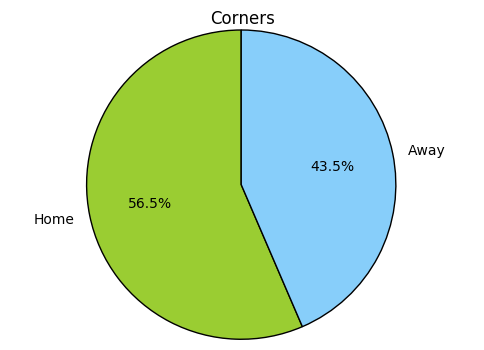

In [30]:
labels = 'Home', 'Away'
sizes = [home_corners, away_corners]
colors = ['yellowgreen', 'lightskyblue']

plt.title('Corners')
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

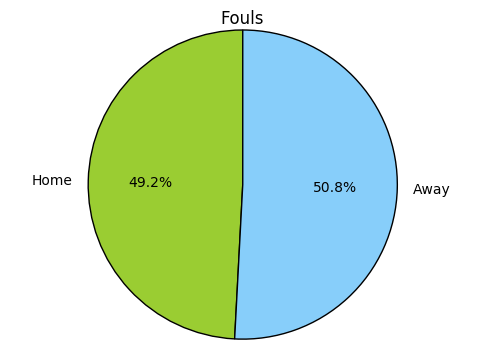

In [29]:
labels = 'Home', 'Away'
sizes = [home_fouls, away_fouls]
colors = ['yellowgreen', 'lightskyblue']

plt.title('Fouls')
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

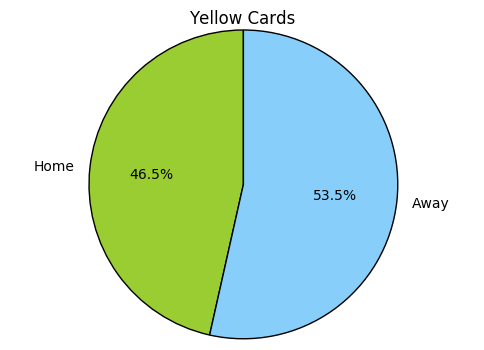

In [28]:
labels = 'Home', 'Away'
sizes = [home_yellow_cards, away_yellow_cards]
colors = ['yellowgreen', 'lightskyblue']

plt.title('Yellow Cards')
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

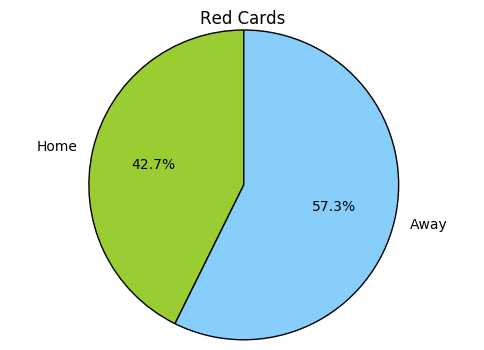

In [27]:
labels = 'Home', 'Away'
sizes = [home_red_cards, away_red_cards]
colors = ['yellowgreen', 'lightskyblue']

plt.title('Red Cards')
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()